# Example Notebook

This is an example notebook.

Modify / remove any of the below as suited for your needs

## Setup

In [1]:
# package install 
# !pip3 install flake8
# !pip3 install m2r
# !pip3 install nbformat
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install pytest
# !pip3 install pytest-cookies
# !pip3 install pytest-cov
# !pip3 install sphinx
# !pip3 install spacy
# !pip3 install nltk
# !pip3 install wordcloud


# Standard python packages
import os
import sys
import string
# # for natural language processing: named entity recognition
# import spacy
# from spacy.displacy.render import EntityRenderer
# from IPython.core.display import display, HTML

# Other package imports
import numpy as np
import pandas as pd



# if uising a Jupyter notebook, include:

# Visualization packages
from wordcloud import WordCloud
from matplotlib import pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.style.use("ggplot")

Setup some global settings and configuration

In [2]:
project_root = os.path.abspath(os.path.join(os.pardir, os.pardir))
data_folder = os.path.join(project_root, 'data')
data_folder_raw = os.path.join(data_folder, 'raw')
src_folder = os.path.join(project_root, 'src')
print(project_root)
print(data_folder)
print(data_folder_raw)
print(src_folder)

/notebooks
/notebooks/data
/notebooks/data/raw
/notebooks/src


This notebook uses the shared package however first we need to ensure it is available (otherwise you get an error about the module not being found). You can either run setup.py as discussed in the readme to install the package or modify the path to include the src folder.

In [3]:
# Explicitly set path so don't need to run setup.py - if we have multiple copies of 
# the code we would otherwise need to setup a seperate environment for each to
# ensure the code pointers are correct.
sys.path.insert(0, "../src")

from neraccidente import examplemodule

## Some Processing

## Appendix 1 - Environment Configuration

In [4]:
print (os.getcwd())
print (sys.version)
print (sys.executable)
print (sys.path)

/notebooks/ner-accidente/notebooks
3.8.2 (default, Jul 16 2020, 14:00:26) 
[GCC 9.3.0]
/usr/bin/python3
['../src', '/notebooks/ner-accidente/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython']


## Appendix 2 - Automated Tests

In [5]:
# Run tests within notebook
f_path = os.getcwd()
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)))

# Run pytest from the repository root
!pytest

os.chdir(f_path)

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /notebooks
plugins: cov-2.10.1, cookies-0.5.1
collected 5 items / 3 errors / 2 selected                                      

==================================== ERRORS ====================================
____________ ERROR collecting ner-accidente/tests/test_notebook.py _____________
import file mismatch:
imported module 'test_notebook' has this __file__ attribute:
  /notebooks/ml_basic/tests/test_notebook.py
which is not the same as the test file we want to collect:
  /notebooks/ner-accidente/tests/test_notebook.py
HINT: remove __pycache__ / .pyc files and/or use a unique basename for your test file modules
_ ERROR collecting ner-accidente/tests/neraccidente/examplemodule/test_add_value_to_numpy.py _
import file mismatch:
imported module 'test_add_value_to_numpy' has this __file__ attribute:
  /notebooks/ml_basic/tests/ml_b

In [6]:
# import our dataSet for analysis
# path = os.path.join('../data', 'raw', 'ner - locatia accidente.csv') 
path = os.path.join('../data', 'raw', 'ner - locatia accidente_WITH_GENERATED2.csv')

df = pd.read_csv(path)

print(df.shape)

(1652, 4)


In [7]:
# TIME TO CLEAN THE TEXT
import spacy
from spacy import displacy
# install romanian models
# !python3 -m spacy download ro_core_news_lg


nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words
# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()
# # remove all stop words that appear in the romanian text corpus
df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

# if 'com' in df.columns:
#     df = df.drop(columns='com')
# df1 = df[df.isna().any(axis=1)]
# df1

In [8]:
sys.path.insert(0, "../scripts")
from nlp.visualization import generate_cloud
from nlp.visualization import plot_word_freq

from nlp.pptext import clean_data
from nlp.pptext import detect_entities_in_dataframe
from nlp.pptext import get_words_appearing_in_both
from nlp.pptext import get_how_many_entities_and_non_entities_per_phrase

Started cleaning: the dataframe column from all the special characters

accidentul a avut loc aseara pe ||strada|| ||calea|| ||iesilor|| din ||sectorul|| ||buiucani|| al capitalei trecatorii au fost primii care au scos victimele din automobilele avariate,
29,1,accident capitala doua automobile s-au ciocnit ||intersectia|| ||strazii|| ||alba|| ||iulia|| cu ||sucevita|| informeaza agora


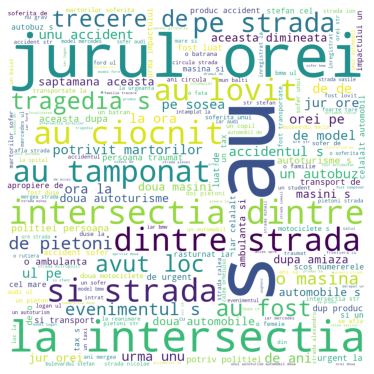

lenghts of the text_to_plot is 30597


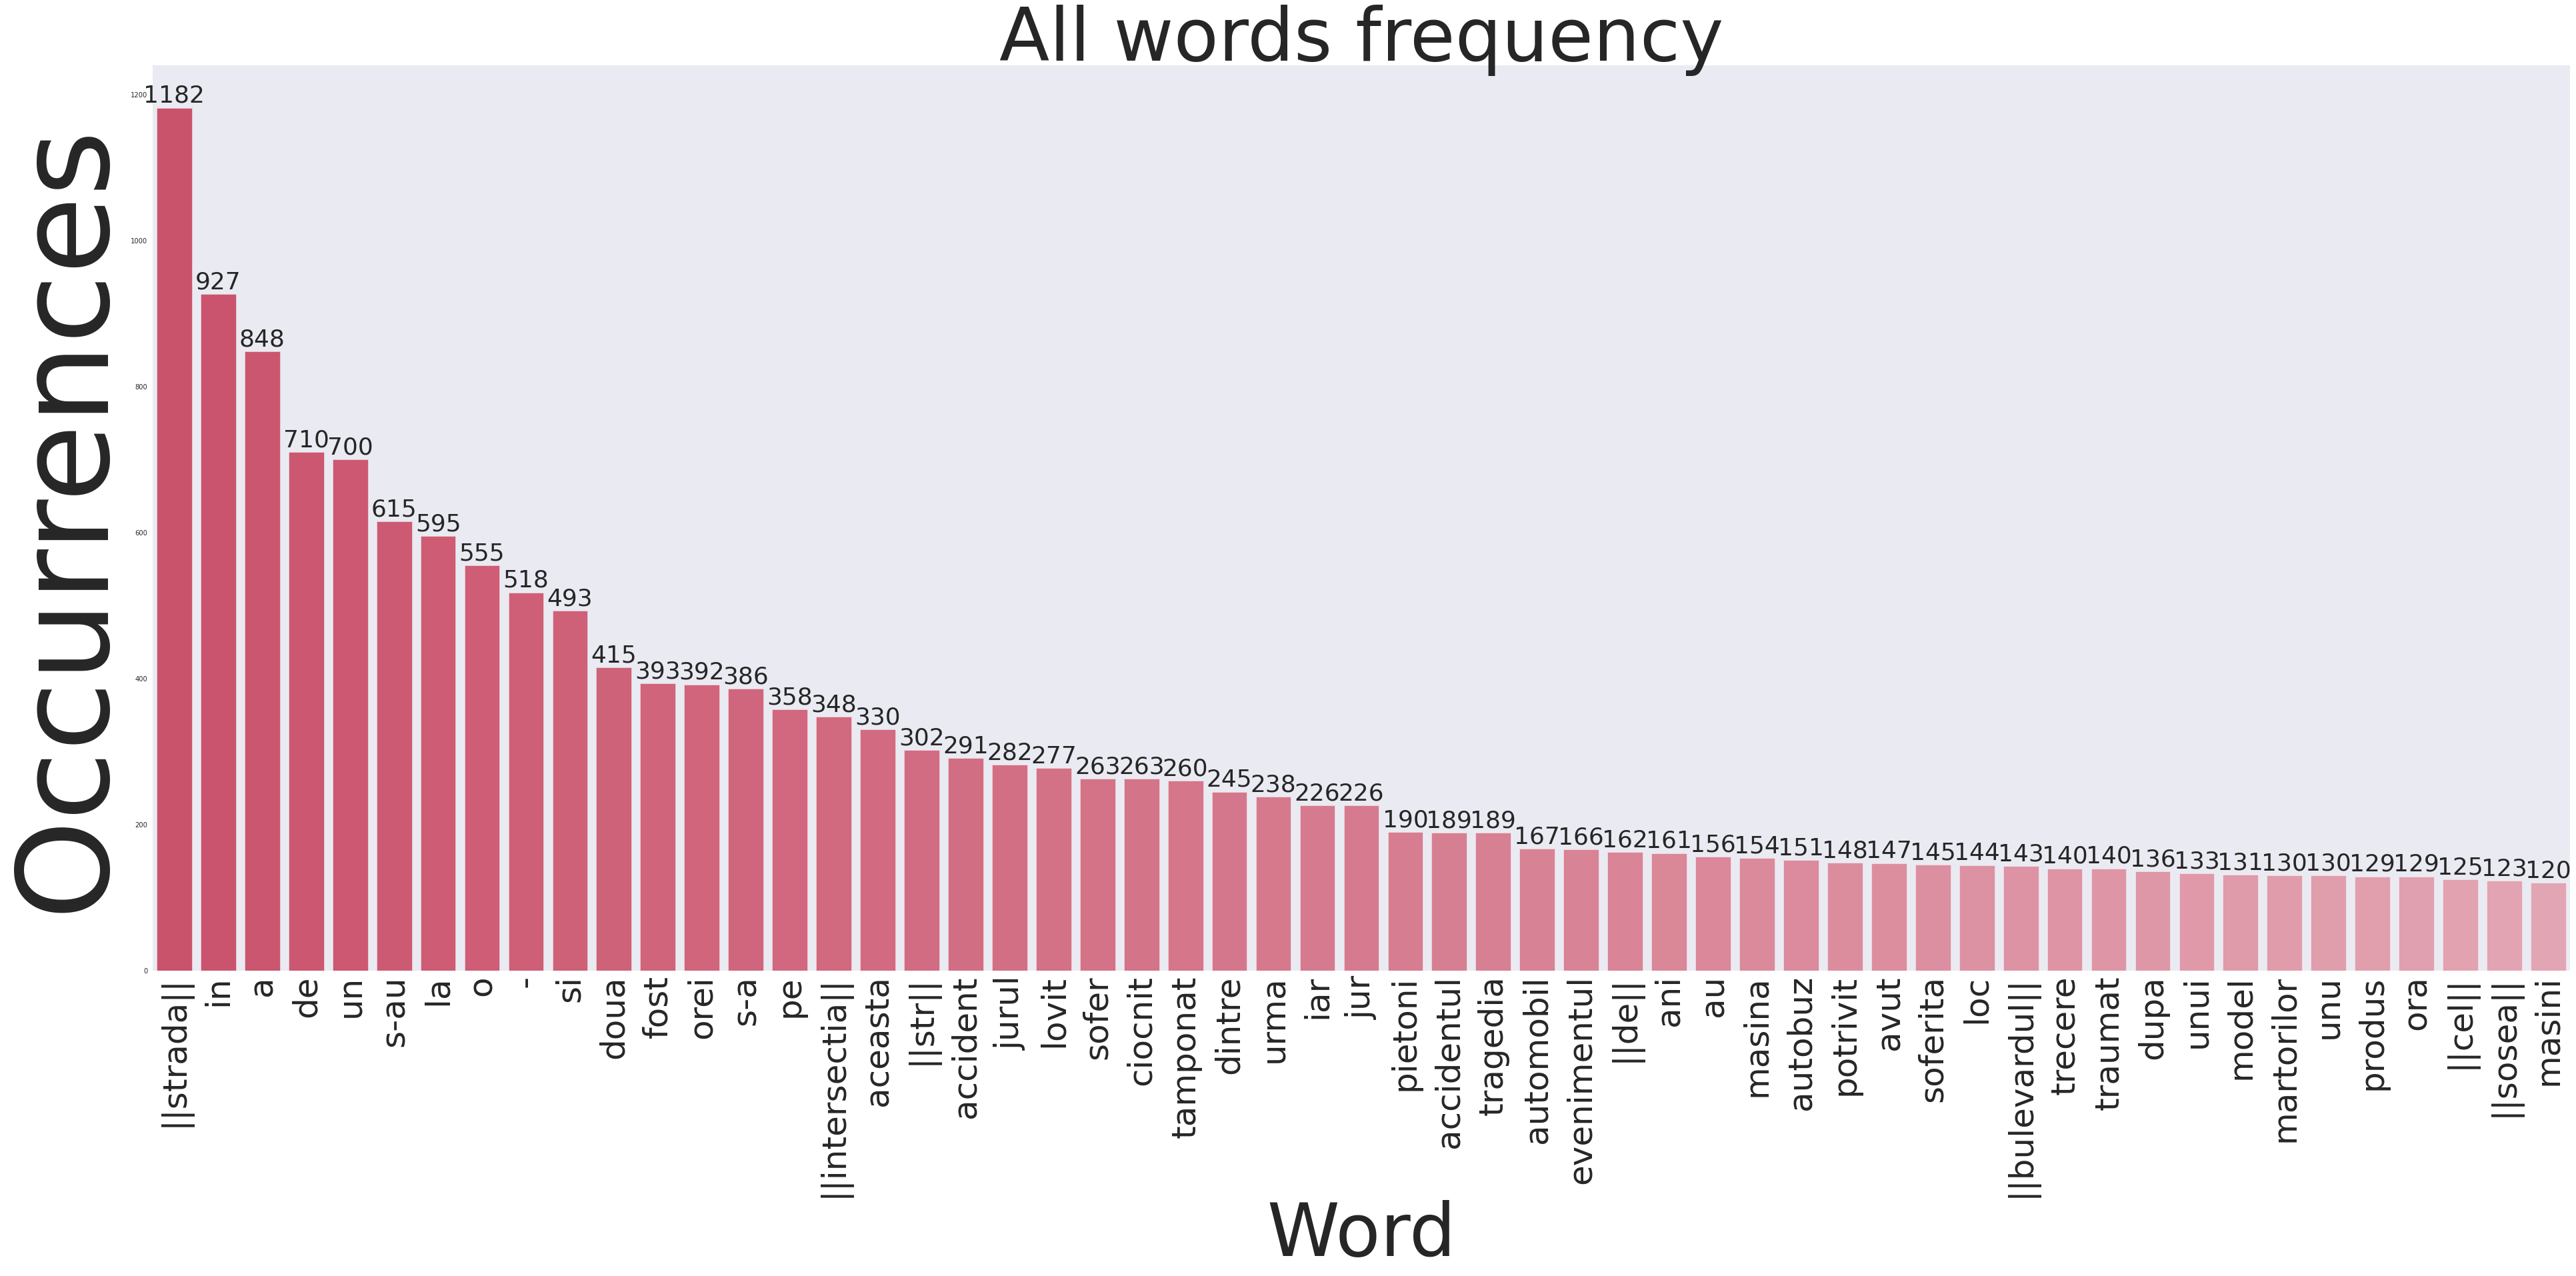

In [9]:
# Clean the dataframe column with the name text and visualize what are the main words that the model
# should take as the main features

all_corpus_text, dataframe_column_clean = clean_data(df['text'])

# Assign the column after it was cleaned of special characters
dataframe_column_clean = df['text_no_sw']

generate_cloud(df["text"])
plot_word_freq(all_corpus_text, title='All words frequency')

# Parse and analyse the whole text corpus

# Parse and analyse the marked words from the text-corpus

# Add columns to our df from the values extracted from them

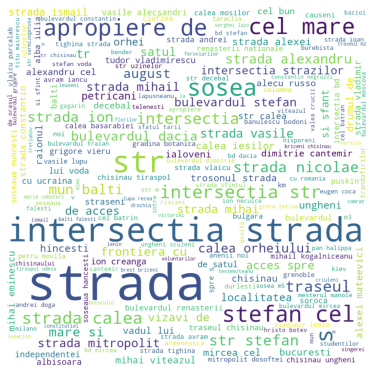

lenghts of the text_to_plot is 8406


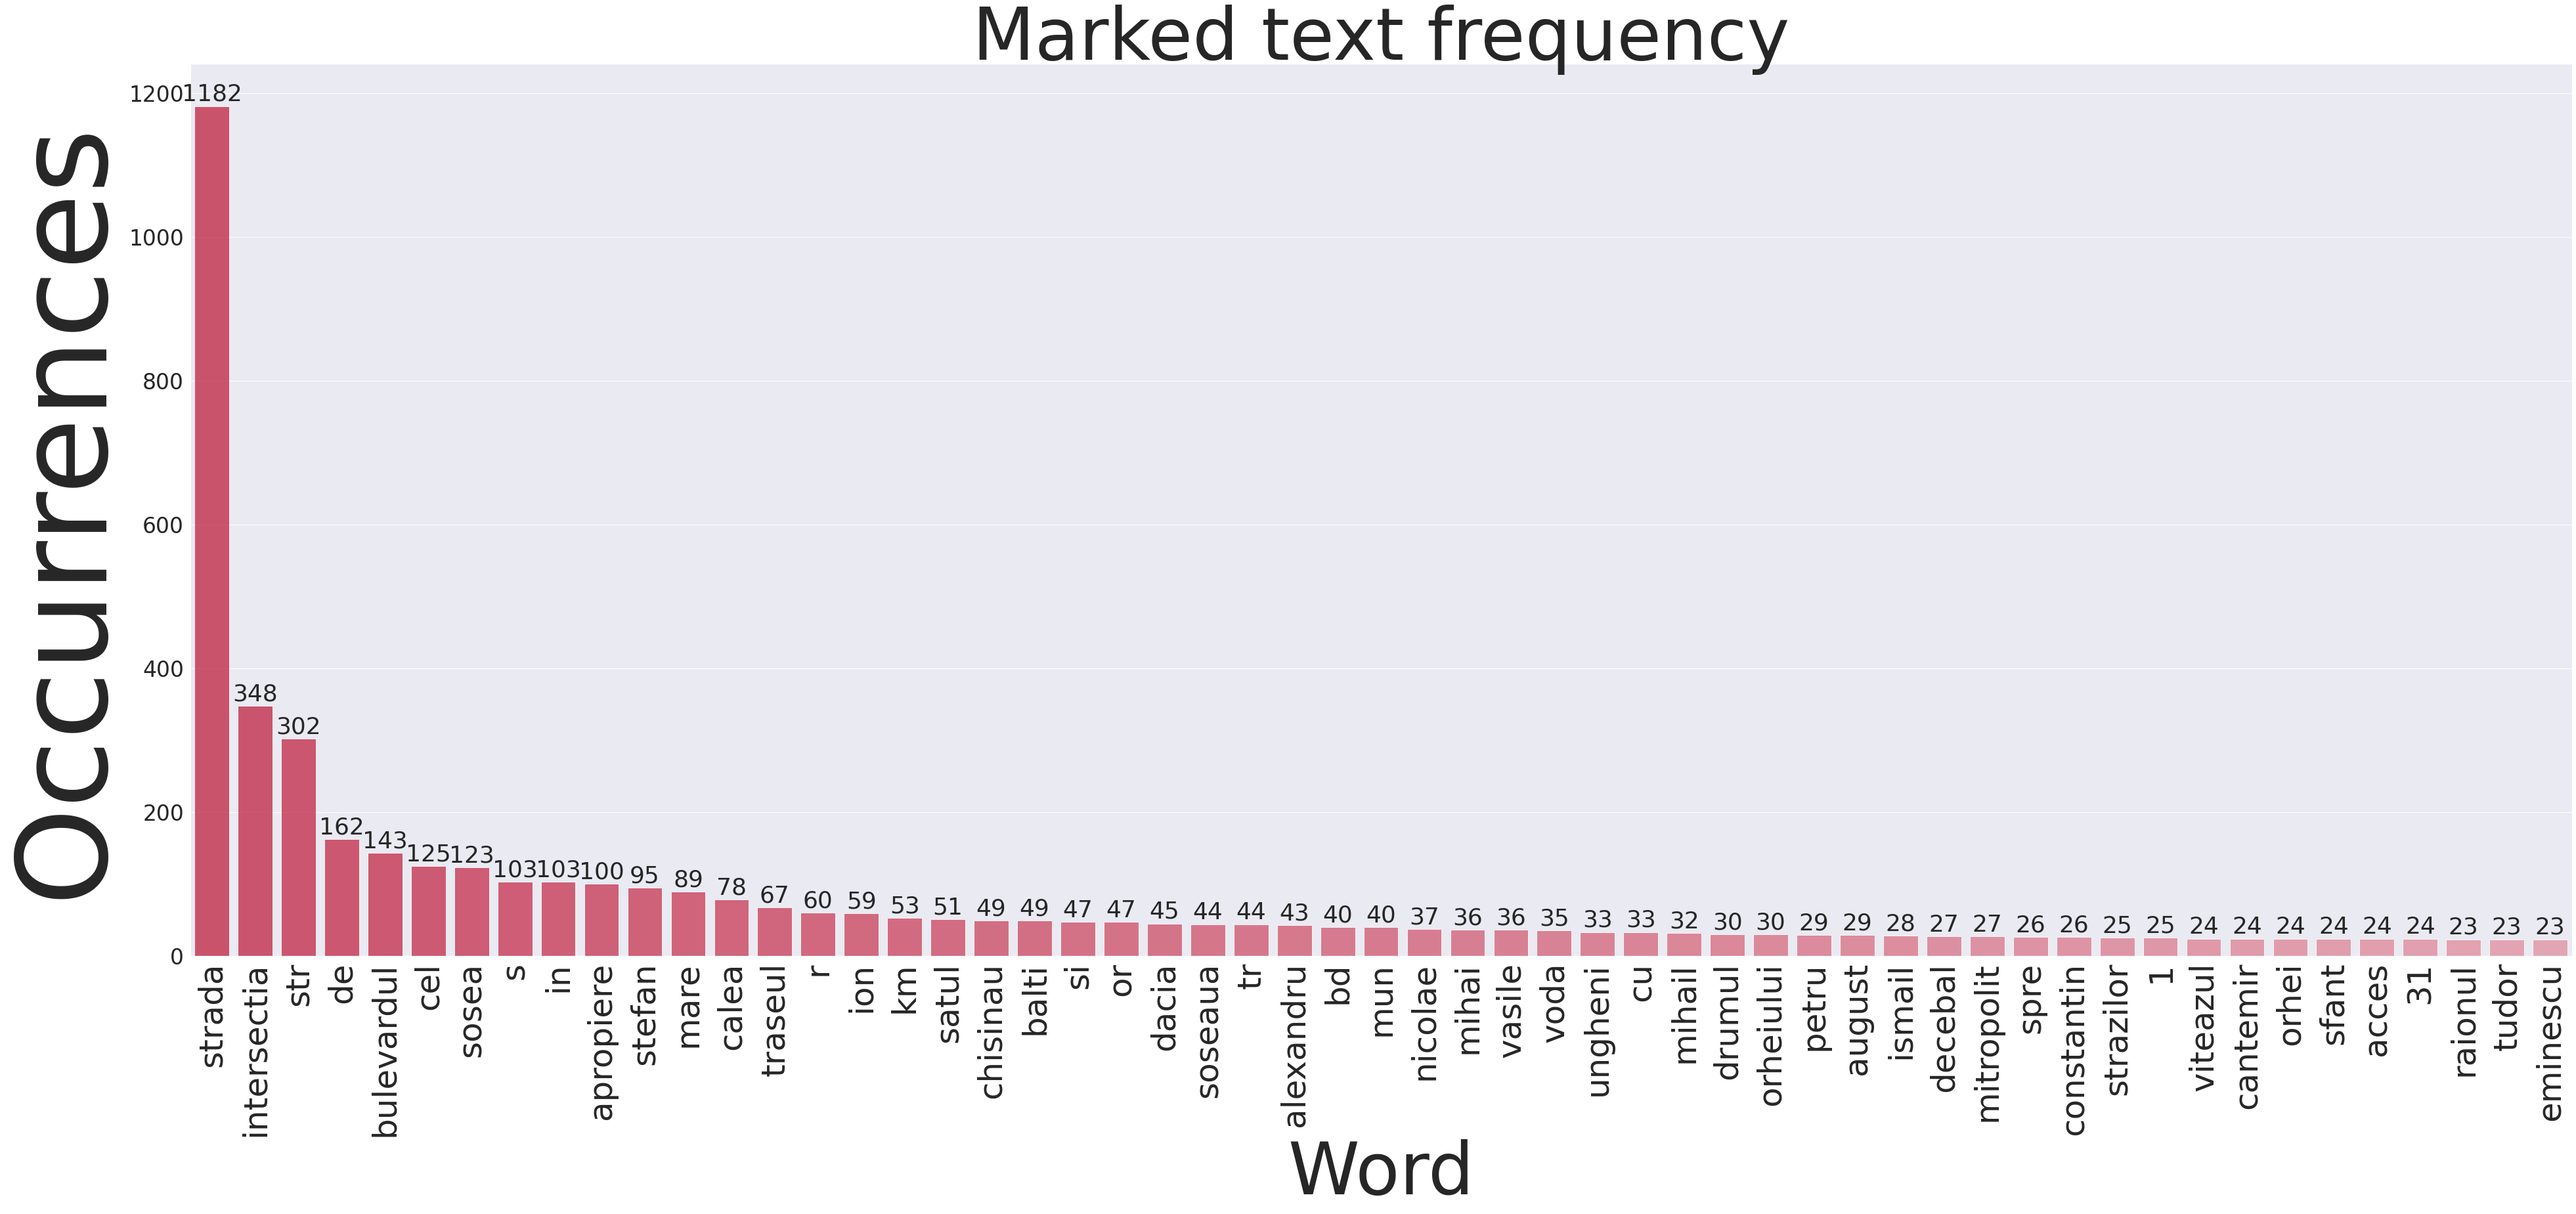

In [10]:
from nlp.pptext import split_in_ent_and_non_ent

# Splits the column in 2 lists (all_marked_text = holds all the enteties and all_unmarked_text = non-enteties)
all_marked_text, all_unmarked_text = split_in_ent_and_non_ent(df['text_no_sw'])

# Visualize text that has not been annotated
generate_cloud(all_marked_text)

plot_word_freq(all_marked_text, title='Marked text frequency')

dict_all_entities, dict_all_non_enteties, dict_num_all_entities, dict_num_all_non_entities \
    = get_how_many_entities_and_non_entities_per_phrase(df['text_no_sw'])


# Assign to the previously created column the dictionaries with the values
df['all_enteties'] = pd.Series(dict_all_entities)
df['all_non_enteties'] = pd.Series(dict_all_non_enteties)
df['num_all_enteties'] = pd.Series(dict_num_all_entities)
df['num_all_non_enteties'] = pd.Series(dict_num_all_non_entities)

# Parse and analyse the unmarked words from the text-corpus

14067


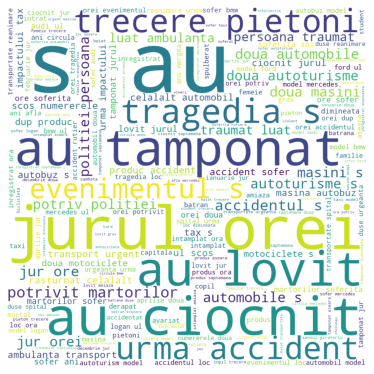

lenghts of the text_to_plot is 14067


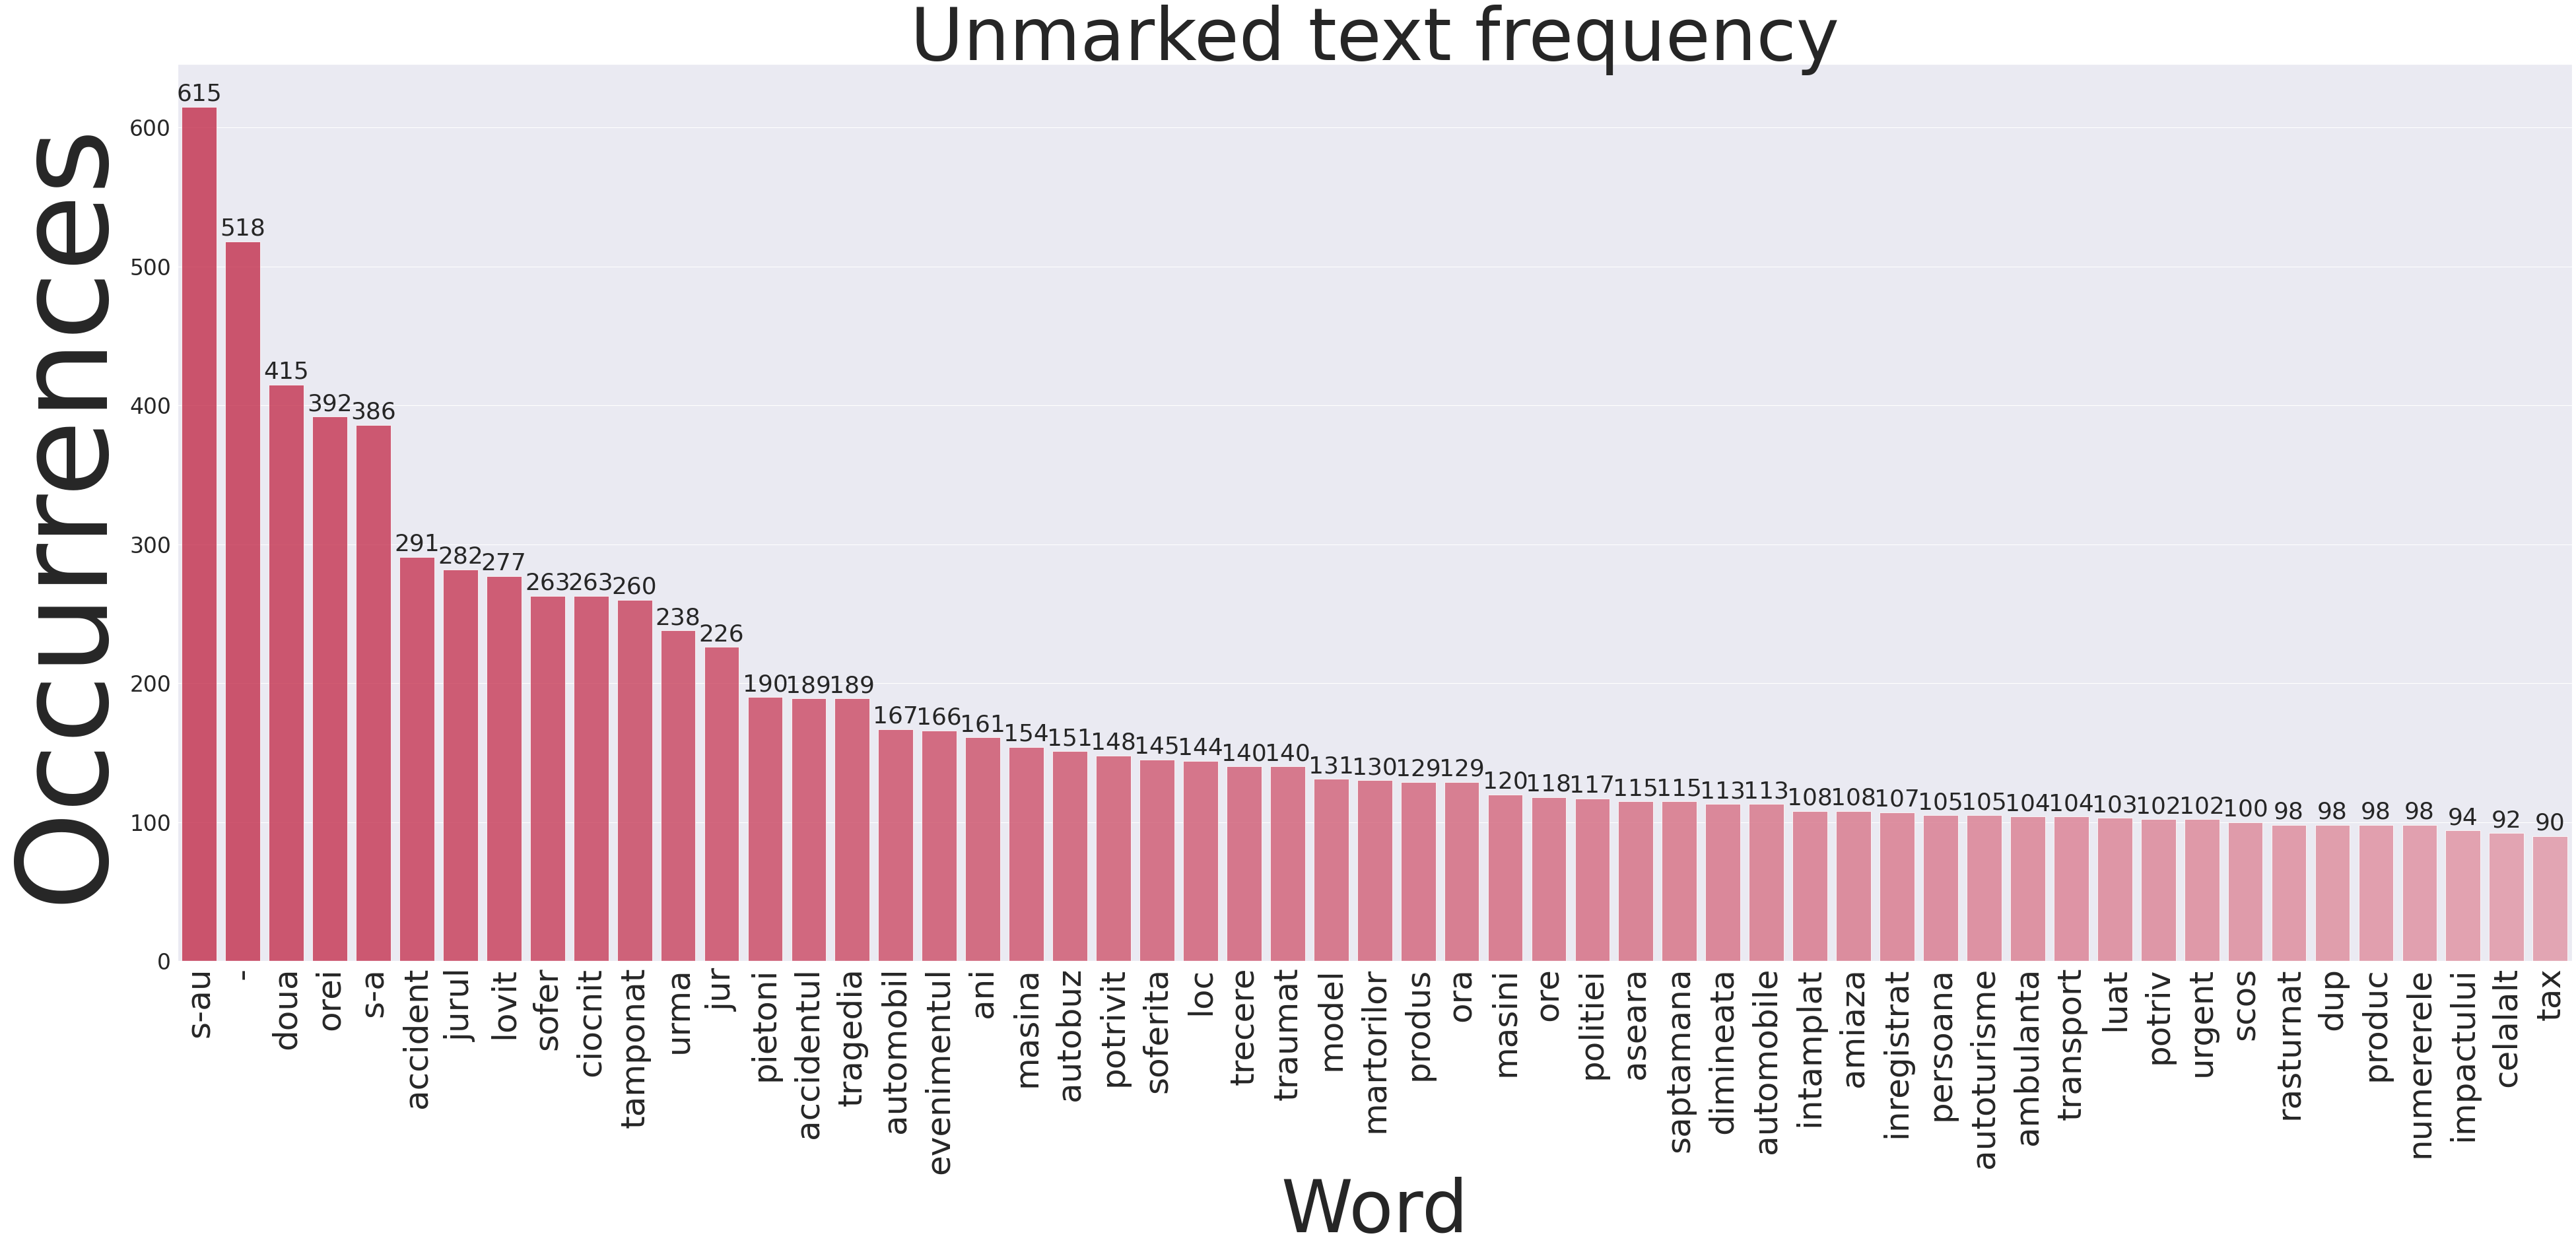

In [11]:
# Visualize text that has not been annotated
# print(all_unmarked_text)
print(len(all_unmarked_text))
generate_cloud(all_unmarked_text)
plot_word_freq(all_unmarked_text, title='Unmarked text frequency')

# Parse and analyse words from both marked and unmarked text-corspus

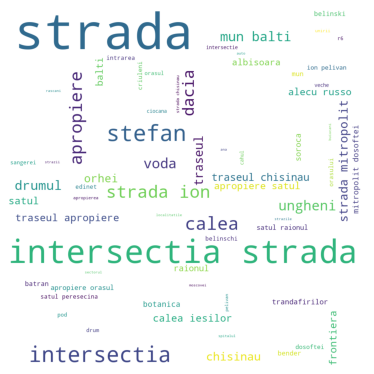

lenghts of the text_to_plot is 2880


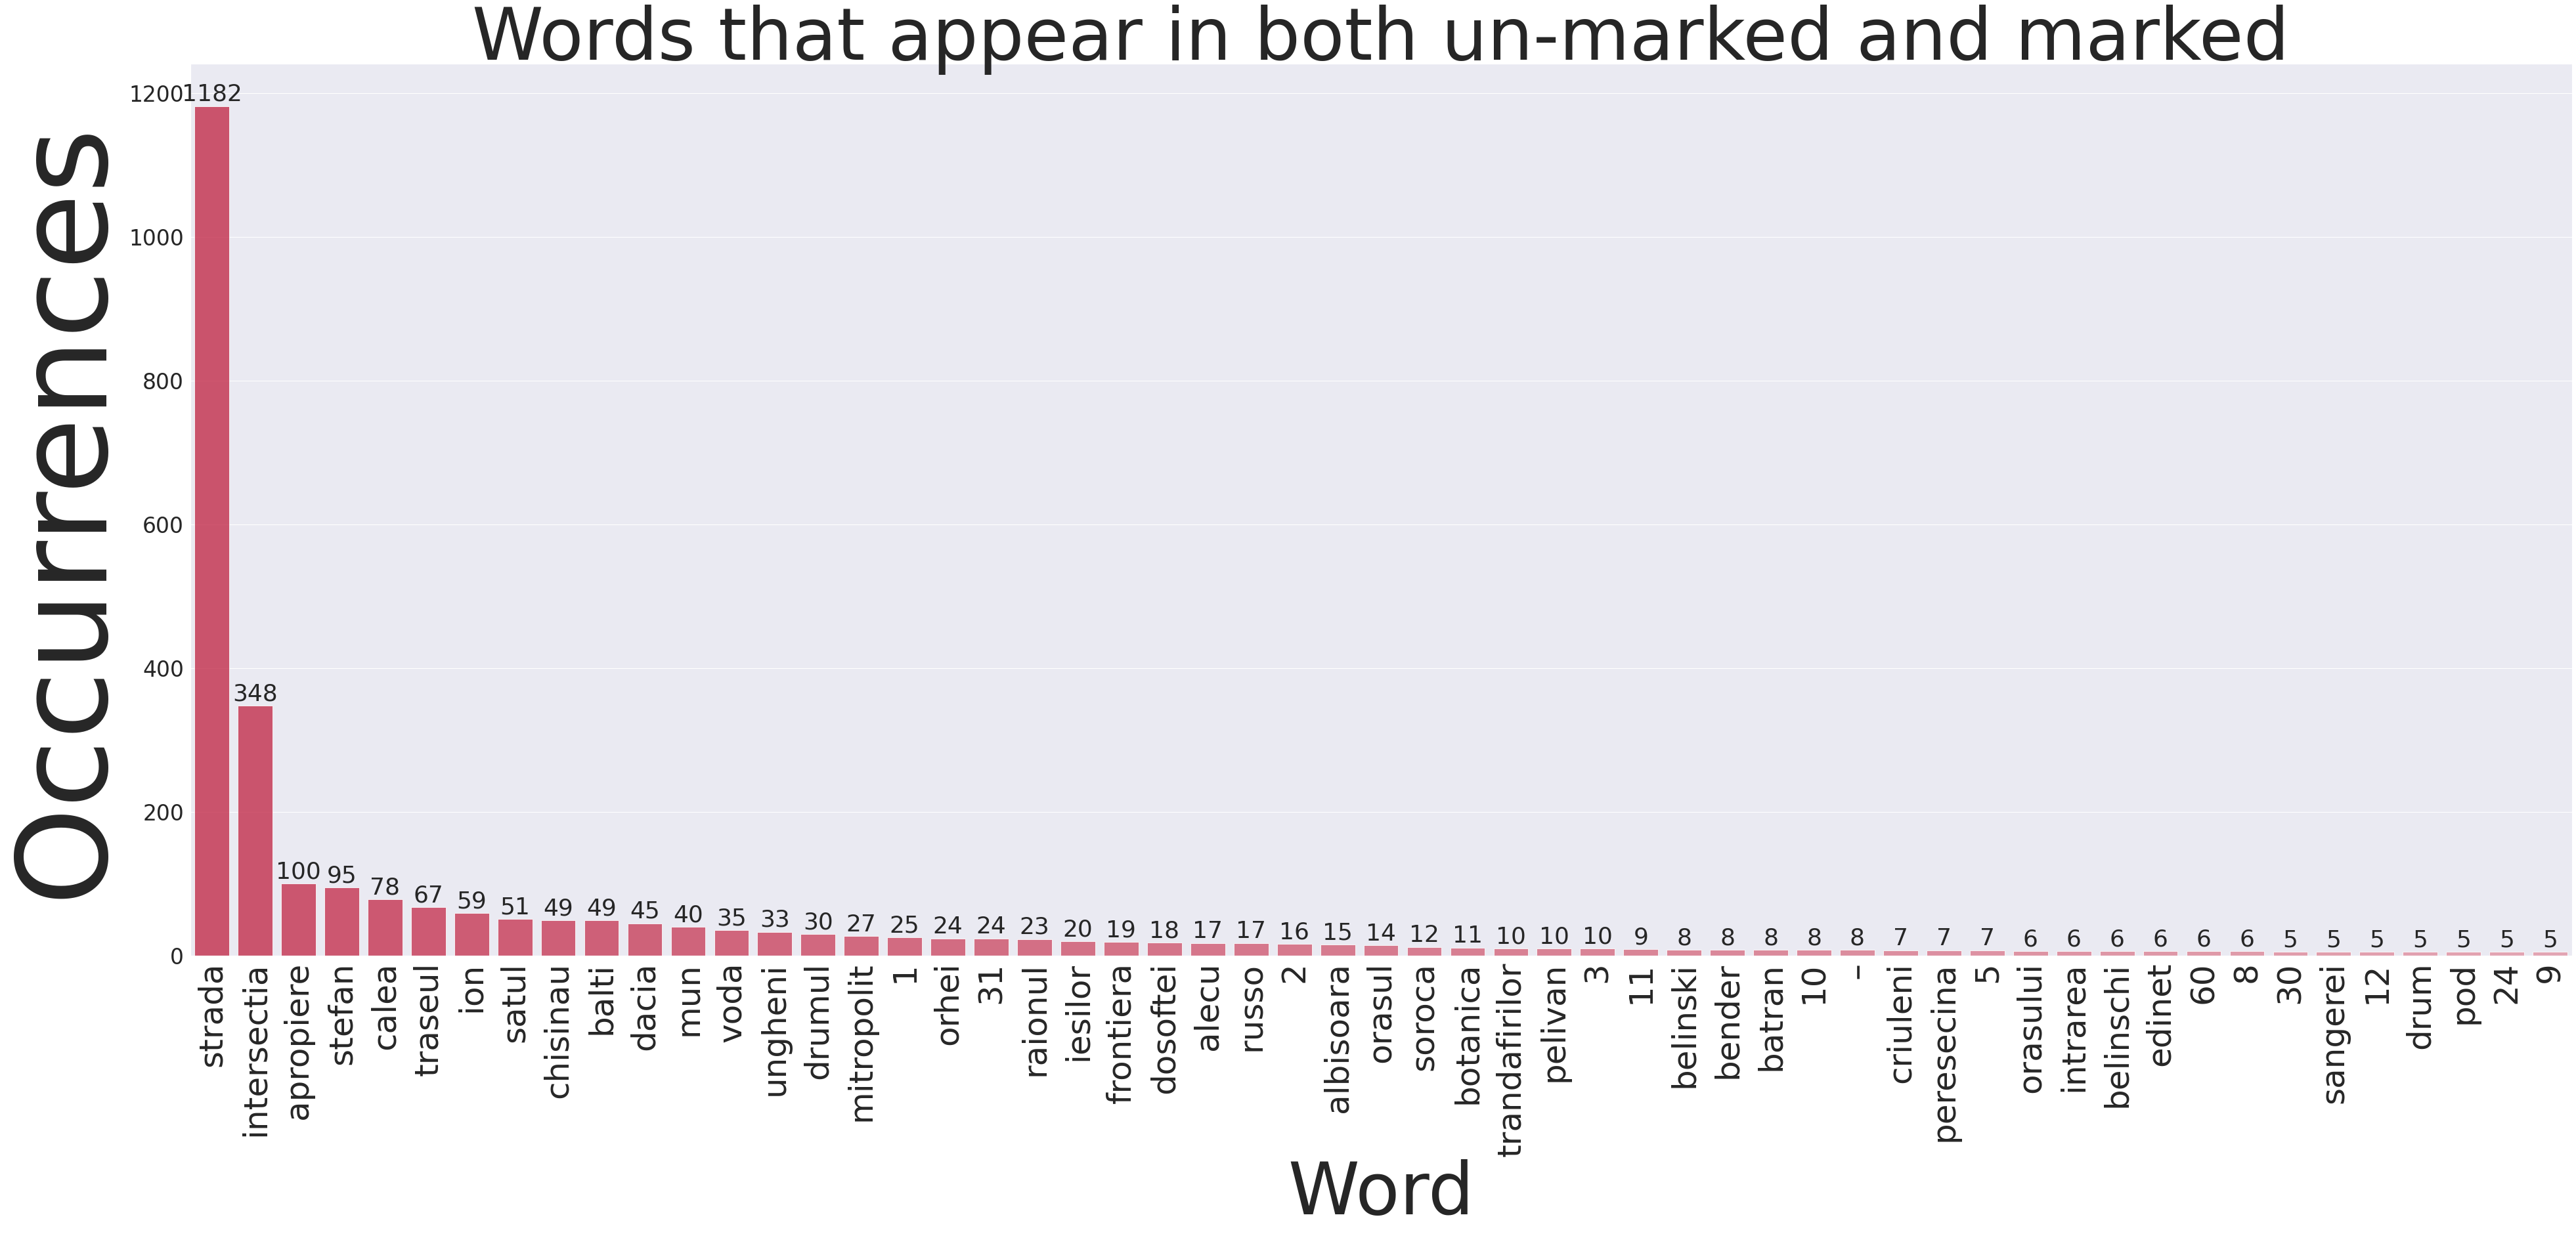

In [12]:
words_that_appear_in_both = get_words_appearing_in_both(all_unmarked_text,all_marked_text)
# print(words_that_appear_in_both)
generate_cloud(words_that_appear_in_both)
plot_word_freq(words_that_appear_in_both, title='Words that appear in both un-marked and marked')

In [13]:
# TIME TO DETECT ENTITIES AND CLEAN THE TEXT
import spacy

# install romanian models
# !python3 -m spacy download ro_core_news_lg

nlp = spacy.load("ro_core_news_lg")
all_stopwords = nlp.Defaults.stop_words


# lower the text so that it all is in lowercase
df['text'] = df['text'].str.lower()

# remove all stop words that appear in the romanian text corpus || dont remove for training purpouses
# df['text_no_sw'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (all_stopwords)]))

df['text_no_sw'] = df['text']

In [14]:
df['text_no_sw_no_bars'] = df['text_no_sw'].str.replace('|','')

df['text_no_sw_no_bars'][0]

'un sofer a tamponat\xa0o femeie\xa0pe trecerea pietoni intersectia bd decebal cu strada trandafirilor\xa0potrivit politiei persoana traumata a fost luata o ambulanta si transportata urgenta spital'

## Iterate over all rows in "df['text_no_sw_no_bars']" and highlight the entities

In [15]:
# TEST THE BUILT-IN ROMANIAN NER MODEL FROM SPACY
nlp = spacy.load("ro_core_news_lg")
nlp.pipe_names

# doc = nlp("impactul a avut loc intersectia strazii 31 august cu strada ismail")
doc = nlp("in zona se circula cu dificulte pe strada bogdan voda direct spre strada aerodromului astfel serviciul ”infotrafic” recomanda conduc auto")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

strada bogdan voda 35 53 LOC
strada aerodromului 66 85 LOC


In [16]:
from nlp.pptext import split_and_save_to_new_column

holding_dict = split_and_save_to_new_column(df['text_no_sw'])
## Insert our data in spacy training format into the df column 'Training_format'
if 'Entities_position' in df.columns:
    df = df.drop(columns='Entities_position')


# Assign to the previously created column the dictionaries with the values
df['Entities_position'] = pd.Series(holding_dict)

df.head()

,id,y,text,com,text_no_sw,all_enteties,all_non_enteties,num_all_enteties,num_all_non_enteties,text_no_sw_no_bars,Entities_position
0,0,1,un sofer a tamponat o femeie pe trecerea pieto...,NaN,un sofer a tamponat o femeie pe trecerea pieto...,"[intersectia, bd, decebal, strada, trandafirilor]","[sofer, tamponat, femeie, trecerea, pietoni, p...",5,14,un sofer a tamponat o femeie pe trecerea pieto...,"{'entities': [(49, 60, 'LOC_ACCIDENT'), (61, 6..."
1,1,1,aseara jurul orei 23:30 politia capitalei a fo...,NaN,aseara jurul orei 23:30 politia capitalei a fo...,"[traseul, spre, localitatea, cheltuitori]","[aseara, jurul, orei, 23:30, politia, capitale...",4,20,aseara jurul orei 23:30 politia capitalei a fo...,"{'entities': [(94, 101, 'LOC_ACCIDENT'), (110,..."
2,6,1,accidentul sa intamplat aceasta dimineata pe |...,NaN,accidentul sa intamplat aceasta dimineata pe |...,"[soseaua, muncesti]","[accidentul, intamplat, dimineata, capitala]",2,4,accidentul sa intamplat aceasta dimineata pe s...,"{'entities': [(45, 52, 'LOC_ACCIDENT'), (53, 6..."
3,7,1,un pieton a fost spulberat mortal aseara un ta...,NaN,un pieton a fost spulberat mortal aseara un ta...,"[soseaua, muncesti]","[pieton, spulberat, mortal, aseara, taxi, acci...",2,11,un pieton a fost spulberat mortal aseara un ta...,"{'entities': [(73, 80, 'LOC_ACCIDENT'), (81, 8..."
4,10,1,accidentul a avut loc sectorul botanica pe ||s...,NaN,accidentul a avut loc sectorul botanica pe ||s...,"[strada, trandafirilor]","[accidentul, loc, sectorul, botanica, jurul, o...",2,7,accidentul a avut loc sectorul botanica pe str...,"{'entities': [(43, 49, 'LOC_ACCIDENT'), (50, 6..."


In [17]:
row1_text = df['text_no_sw_no_bars'][0]
print(type(row1_text))
print(row1_text)

enteties_text = df['all_enteties'][1]
Entities_position_text = df['Entities_position'][1]

print(type(enteties_text))
print(enteties_text)
print(type(Entities_position_text))
print((Entities_position_text))

<class 'str'>
un sofer a tamponat o femeie pe trecerea pietoni intersectia bd decebal cu strada trandafirilor potrivit politiei persoana traumata a fost luata o ambulanta si transportata urgenta spital
<class 'list'>
['traseul', 'spre', 'localitatea', 'cheltuitori']
<class 'dict'>
{'entities': [(94, 101, 'LOC_ACCIDENT'), (110, 114, 'LOC_ACCIDENT'), (115, 126, 'LOC_ACCIDENT'), (127, 138, 'LOC_ACCIDENT')]}


In [18]:
# Save the current DF into a .pkl(pickle) data format so that each cell in the DF will maintain its data-type
# to later use for analysis
df.to_pickle('../data/processed/ner - locatia accidente_clean.plk')

## Deviding the Training-Set from the testing set
# join half of the real phrases with half of the generated ones for both training and testing
records_train = df[['text_no_sw_no_bars','Entities_position']].iloc[np.r_[75:156, 160:900]].to_records(index=False)
records_test = df[['text_no_sw_no_bars','Entities_position']].iloc[np.r_[0:75, 900:1450]].to_records(index=False)

records_test_real = df[['text_no_sw_no_bars','Entities_position']][0:75].to_records(index=False)
records_test_generated = df[['text_no_sw_no_bars','Entities_position']][900:1450].to_records(index=False)


result_train = list(records_train)
result_test = list(records_test)

result_test_real = list(records_test_real)
result_test_generated = list(records_test_generated)

In [19]:
training_data = result_train
print("We have",len(training_data)," training samples")

testing_data = result_test
print("We have",len(testing_data)," testing samples")

testing_data_real = result_test_real
print("We have",len(testing_data_real),"  real testing samples")

testing_data_generated = result_test_generated
print("We have",len(testing_data)," generated testing samples")

We have 821  training samples
We have 625  testing samples
We have 75   real testing samples
We have 625  generated testing samples


In [20]:
from train.train import main
        
# Train the model using the already existing: model='ro_core_news_lg'
#                          using the dataset:TRAIN_DATA= training_data
#                   train for 100 iterations: n_iter=100
#                     then save the model to:output_dir='../src/models/'
main(model='ro_core_news_lg',TRAIN_DATA= training_data, output_dir='../src/models/', n_iter=100)

Started Training
Losses {'ner': 13110.05649733542}
Losses {'ner': 11711.50680751726}
Losses {'ner': 11559.455708401389}
Losses {'ner': 11460.894006162296}
Losses {'ner': 11431.878874503076}
Losses {'ner': 11293.31491061778}
Losses {'ner': 11325.574125054069}
Losses {'ner': 11196.013483999086}
Losses {'ner': 11298.319206744432}
Losses {'ner': 11332.022784262233}
Losses {'ner': 11206.985164476491}
Losses {'ner': 11185.558456346393}
Losses {'ner': 11191.559158011358}
Losses {'ner': 11172.134968482527}
Losses {'ner': 11113.359607668594}
Losses {'ner': 11254.60931723383}
Losses {'ner': 11178.482994759164}
Losses {'ner': 11148.779144448752}
Losses {'ner': 11211.853521840161}
Losses {'ner': 11133.820843358537}
Losses {'ner': 11167.22434142232}
Losses {'ner': 11106.194846509334}
Losses {'ner': 11083.58630610425}
Losses {'ner': 11176.395409899467}
Losses {'ner': 11111.361388555872}
Losses {'ner': 11107.272214761004}
Losses {'ner': 11002.611249086342}
Losses {'ner': 10983.900954910841}
Losses {'

In [22]:
nlp = spacy.load('../src/models/')


def remove_whitespace_entities(doc):
    doc.ents = [e for e in doc.ents if not e.text.isspace()]
    return doc

nlp.add_pipe(remove_whitespace_entities, after='ner')

# doc = nlp("Totul s-a întâmplat în data de 27 octombrie pe o stradă din municipiul hincesti")
doc = nlp("O şoferiţă din Chişinău a intrat dur cu al său Mercedes într-o staţie de aşteptare a transportului public Accidentul cu pricina a avut loc în această după amiază în apropriere de intersecţia străzilor Meșterul Manole și Vadul lui Vodă din sectorul Ciocana")
# doc = nlp('De unde şi când a apărut acolo? În această după amiază, pe strada Nicolae Dimo din capitală, camera de bord dintr-un SUV a surprins momentul în care automobilul premergător intră brusc într-un obstacol. Apariţia în trafic s-a dovedit a fi un alt autovehicul care se afla pe contrasens!')
# doc = nlp("Un alt accident deosebit de grav a avut loc în această dimineaţă, aproximativ 6:30, pe un traseu din raionul Soroca. Un şofer de doar 19 ani a decedat după ce s-a izbit cu maşina de model Toyota Corolla de un podeţ.")

list_ent_results = []
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    tuple_ent =(ent.start_char, ent.end_char, ent.label_) 
    list_ent_results.append(tuple_ent)

staţie 63 69 LOC_ACCIDENT
de 70 72 LOC_ACCIDENT
în 162 164 LOC_ACCIDENT
apropriere 165 175 LOC_ACCIDENT
de 176 178 LOC_ACCIDENT
intersecţia 179 190 LOC_ACCIDENT
străzilor 191 200 LOC_ACCIDENT
Meșterul 201 209 LOC_ACCIDENT
Manole 210 216 LOC_ACCIDENT
și 217 219 LOC_ACCIDENT
Vadul 220 225 LOC_ACCIDENT
lui 226 229 LOC_ACCIDENT
Vodă 230 234 LOC_ACCIDENT
